Import all necessary libraries

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

Read in the csv file that is uploaded to GitHub

In [ ]:
rice = pd.read_csv('https://raw.githubusercontent.com/CinderLeaf/CIS9660_Lab5/main/Rice-Gonen%20andJasmine.csv')

#take a look at the dataset
rice.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,jasmine
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,jasmine
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,jasmine
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,jasmine
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,jasmine


Check the shape and information about the dataset

In [ ]:
rice.shape

(18185, 12)

In [ ]:
rice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  object 
dtypes: float64(8), int64(3), object(1)
memory usage: 1.7+ MB


In [ ]:
rice.isna().sum()

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

Looks like the dataset does not have any missing values. We will then check the basic stats of the dataset numeric features

In [ ]:
rice.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845


Drop the id column since it is not relevant in this exercise

In [ ]:
rice.drop(['id'], axis = 1, inplace = True)
rice.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,jasmine
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,jasmine
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,jasmine
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,jasmine
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,jasmine


Check how many datapoints each rice class has

In [ ]:
rice['Class'].value_counts()

jasmine    9985
Gonen      8200
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


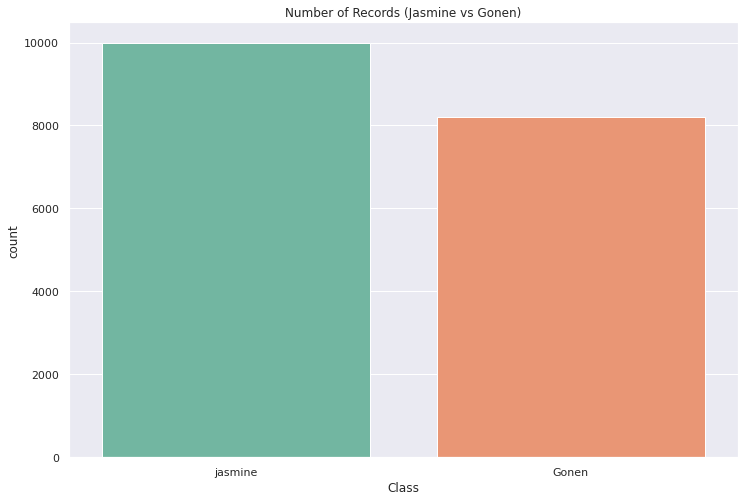

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})

sns.countplot((rice['Class']), palette = 'Set2').set(title = 'Number of Records (Jasmine vs Gonen)')
plt.show()

Generate a correlation matrix to see the correlation between each feature.
As we can see, many features are highly correlated positively

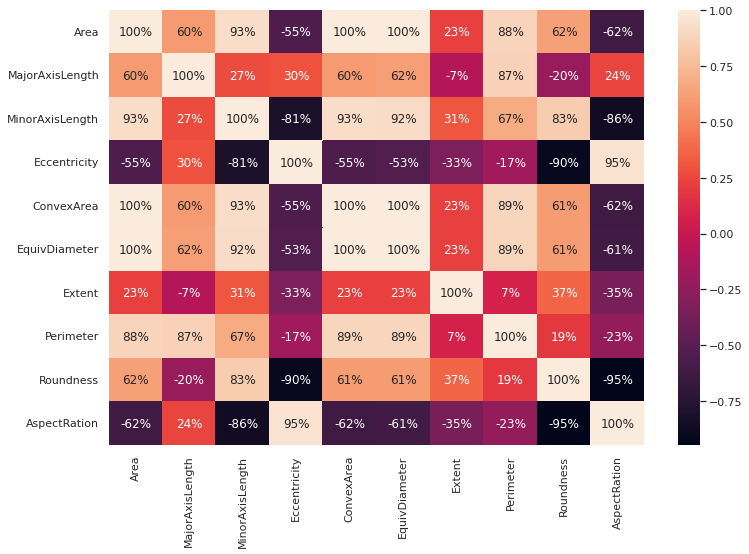

In [ ]:
sns.heatmap(rice.corr(), annot = True, fmt = '.0%')
plt.show()

Generate a series of charts to visualize the difference between a Jasmine rice and Gonen rice in their area, roundness, and minoraxislength. (I chose these three columns because these columns are relatively higher correlated to each other as compared through all the columns)

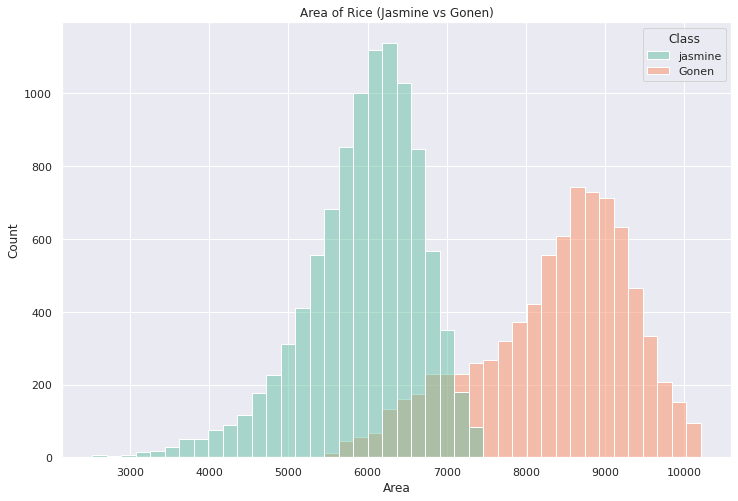

In [ ]:
sns.histplot(x = 'Area', data = rice, hue = 'Class', palette = 'Set2').set(title = 'Area of Rice (Jasmine vs Gonen)')
plt.show()

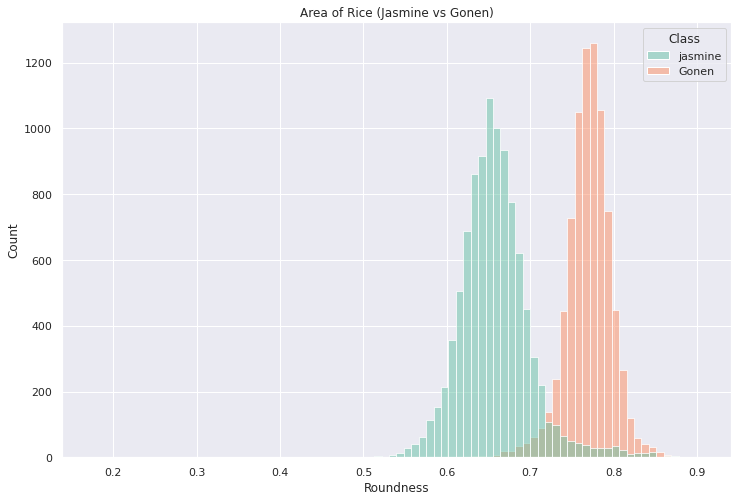

In [ ]:
sns.histplot(x = 'Roundness', data = rice, hue = 'Class', palette = 'Set2').set(title = 'Area of Rice (Jasmine vs Gonen)')
plt.show()

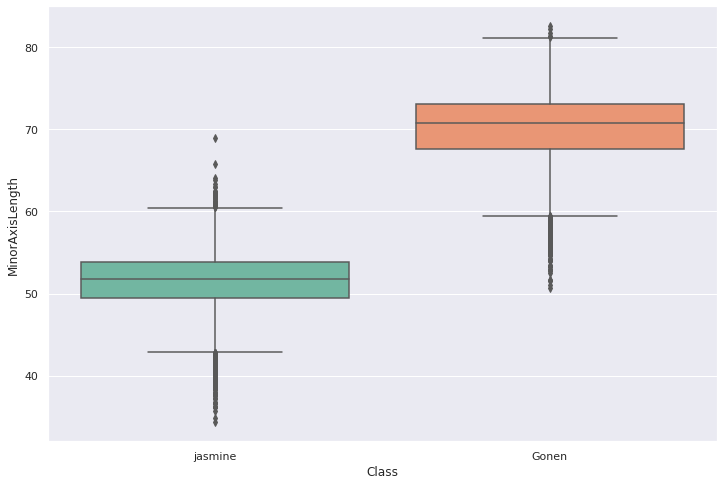

In [ ]:
sns.boxplot(x = 'Class', y = 'MinorAxisLength', data = rice, palette = 'Set2')
plt.show()

Split the dataset into training dataset and test dataset

In [ ]:
#define the X(features) set
X = rice.drop(['Class'], axis = 1).values
X

array([[4.53700000e+03, 9.22293165e+01, 6.40127687e+01, ...,
        2.73085000e+02, 7.64509614e-01, 1.44079562e+00],
       [2.87200000e+03, 7.46918807e+01, 5.14004545e+01, ...,
        2.08317000e+02, 8.31658201e-01, 1.45313658e+00],
       [3.04800000e+03, 7.62931638e+01, 5.20434911e+01, ...,
        2.10012000e+02, 8.68433574e-01, 1.46595015e+00],
       ...,
       [6.36500000e+03, 1.54777085e+02, 5.29080845e+01, ...,
        3.42253000e+02, 6.82831810e-01, 2.92539573e+00],
       [5.96000000e+03, 1.51397924e+02, 5.14745998e+01, ...,
        3.43371000e+02, 6.35226924e-01, 2.94121614e+00],
       [6.13400000e+03, 1.53081981e+02, 5.15906056e+01, ...,
        3.38613000e+02, 6.72274101e-01, 2.96724528e+00]])

In [ ]:
#define the y(label) dataset
y = rice['Class'].values
y

array(['jasmine', 'jasmine', 'jasmine', ..., 'Gonen', 'Gonen', 'Gonen'],
      dtype=object)

In [ ]:
#split the train and test sets, and set the test size for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

Since some columns have large difference in their values, a feature scaling needs to be performed to prevent impact from larger values/outliers

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Train the decision tree classifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Get the parameters of the decision tree

In [ ]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
rf = RandomForestClassifier(n_estimators=10, criterion = 'gini', random_state = 1)
rf.fit(X_train, y_train.ravel())

RandomForestClassifier(n_estimators=10, random_state=1)

Perform a K-Fold cross validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=5)
result = cross_val_score(dt, X_train, y_train.ravel(), cv = kf, scoring = 'accuracy')
print(f'Avg accuracy for decision tree: {result.mean()}')

result = cross_val_score(rf, X_train, y_train.ravel(), cv = kf, scoring = 'accuracy')
print(f'Avg accuracy for random forest: {result.mean()}')

Avg accuracy for decision tree: 0.9844452641147484
Avg accuracy for random forest: 0.9880588063714104


Predict the results from the test dataset

In [ ]:
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

Decision Tree: Classification Report

In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

       Gonen       0.98      0.99      0.98      2468
     jasmine       0.99      0.99      0.99      2988

    accuracy                           0.99      5456
   macro avg       0.99      0.99      0.99      5456
weighted avg       0.99      0.99      0.99      5456



Random Forest: Classification Report

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

       Gonen       0.99      0.99      0.99      2468
     jasmine       0.99      0.99      0.99      2988

    accuracy                           0.99      5456
   macro avg       0.99      0.99      0.99      5456
weighted avg       0.99      0.99      0.99      5456



In [ ]:
dt.feature_importances_

array([0.00417486, 0.00245822, 0.9503738 , 0.00268517, 0.0052045 ,
       0.00235738, 0.00551126, 0.00346473, 0.01419302, 0.00957706])

In [ ]:
X = rice.drop(['Class'], axis = 1)
feature_names = X.columns

In [ ]:
feature_importance = pd.DataFrame(dt.feature_importances_, index = feature_names).sort_values(0, ascending = False)
feature_importance

,0
MinorAxisLength,0.950374
Roundness,0.014193
AspectRation,0.009577
Extent,0.005511
ConvexArea,0.005205
Area,0.004175
Perimeter,0.003465
Eccentricity,0.002685
MajorAxisLength,0.002458
EquivDiameter,0.002357
